In [316]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [317]:
#Discretise space x
x0 = 20.
dx = 0.1
xs = np.arange(-x0, x0, dx)

In [328]:
#Defining important constants / variables
U = 50
rho = 1000
g = 9.81
T = (0.27 * rho * U ** 4) / g
mu = 0.001
epsilon = 0.001

$$P(x) = \frac{\rho U^2}{2} e^{\frac{-5 g^2 x^2}{U^4}}$$

In [319]:
#Defining pressure function
P = epsilon * (rho * U * U) / 2 * np.exp(-5 * (g ** 2) * (xs ** 2) / (U ** 4))

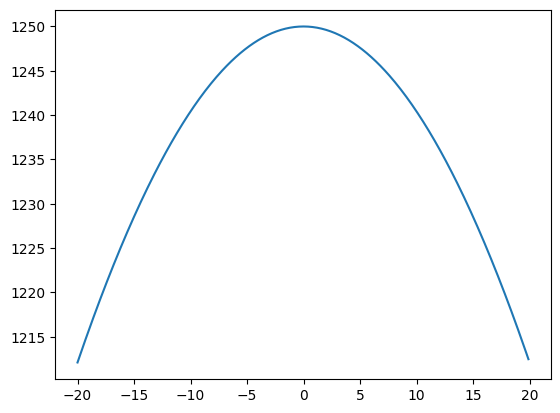

In [320]:
#Plotting the pressure distribution
plt.plot(xs, P)
plt.show()

$$B(a) = \mathcal{F} \{P(x) \} = \frac{1}{\sqrt{2 \pi}} \int_{- \infty}^{\infty} P(x) e^{-iax} \; dx

In [321]:
B = np.fft.fftshift(np.abs(np.fft.fft(P))) / np.sqrt(len(P))

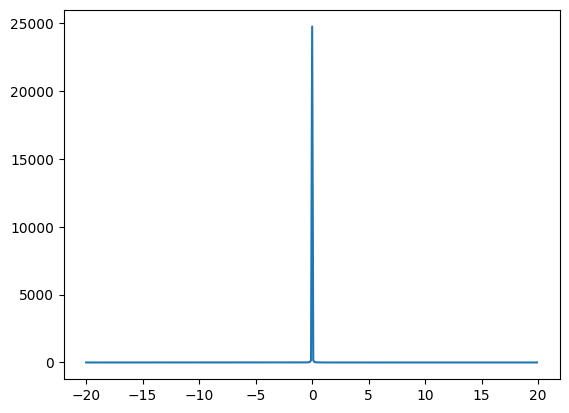

In [322]:
plt.plot(xs, B)
plt.show()

$$D(a) = a - \frac{g}{U^2} - \frac{a^2 T}{\rho U^2} - i \mu \text{ for } a > 0$$

In [323]:
D = xs - g / U ** 2 - (T * xs ** 2) / (rho * U ** 2) - 1j * mu

c:\Program Files\Python\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


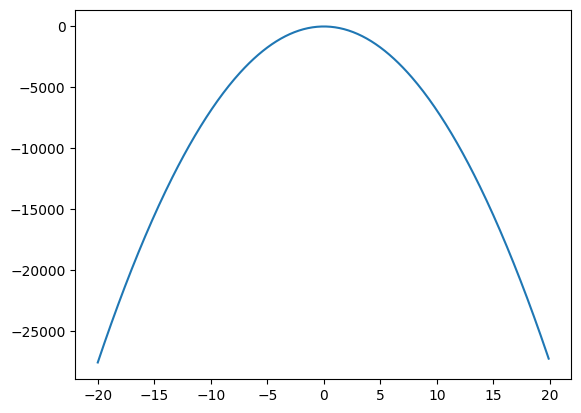

In [324]:
plt.plot(xs, D)
plt.show()

$$\eta(x) = \frac{2}{\rho U^2} \int_0^{\infty} \frac{ e^{iax} B(a)}{D(a)} \; dx$$

In [332]:
#Define integrand
#integrand = np.array([[np.exp(1j * a * x) for a in xs[xs > 0]] for x in xs]) * [B for x in xs] / [D for x in xs]
integrand = np.zeros((len(xs), len(xs[xs > 0])), dtype="complex")
for i, x in enumerate(xs):
    for j, a in enumerate(xs[xs > 0]):
        integrand[i][j] = np.exp(1j * a * x) * B[j] / D[j]

In [335]:
eta = np.abs(np.trapz(integrand, axis = 1))

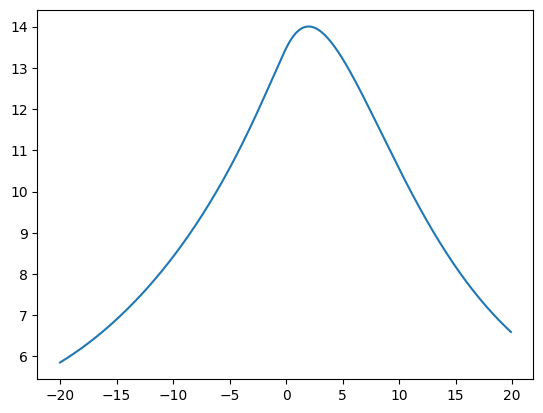

In [336]:
plt.plot(xs, eta)
plt.show()